# Подготовка данных

In [519]:
import numpy as np
import pandas as pd


from sklearn.metrics import r2_score as r2, mean_absolute_error as mae, mean_squared_error as mse

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [520]:
DATASET_PATH = 'project_task/train.csv'
PREPARED_DATASET_PATH = 'project_task/train_prepared.csv'

DATASET_TEST_PATH = 'project_task/test.csv'
PREPARED_DATASET_TEST_PATH = 'project_task/test_prepare/d.csv'

**Описание датасета**

* **Id** - идентификационный номер квартиры
* **DistrictId** - идентификационный номер района
* **Rooms** - количество комнат
* **Square** - площадь
* **LifeSquare** - жилая площадь
* **KitchenSquare** - площадь кухни
* **Floor** - этаж
* **HouseFloor** - количество этажей в доме
* **HouseYear** - год постройки дома
* **Ecology_1, Ecology_2, Ecology_3** - экологические показатели местности
* **Social_1, Social_2, Social_3** - социальные показатели местности
* **Healthcare_1, Helthcare_2** - показатели местности, связанные с охраной здоровья
* **Shops_1, Shops_2** - показатели, связанные с наличием магазинов, торговых центров
* **Price** - цена квартиры

In [521]:
df = pd.read_csv(DATASET_PATH)
df['Id'] = df['Id'].astype(str)
df.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [522]:
df.shape

(10000, 20)

1977    2652
2017     308
2016     305
2015     299
2014     210
        ... 
1914       1
1916       1
1910       1
1947       1
1928       1
Name: HouseYear, Length: 94, dtype: int64

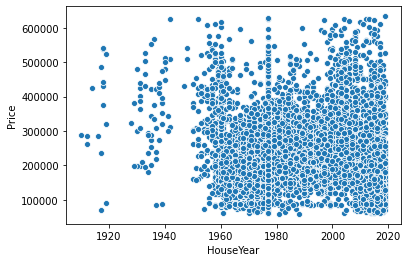

In [523]:
df = df[df['HouseYear'] < 2020].reset_index(drop=True)
sns.scatterplot(x=df['HouseYear'], y=df['Price'])
df['HouseYear'].value_counts()

In [524]:
df = df[df['KitchenSquare'] < 1000].reset_index(drop=True)

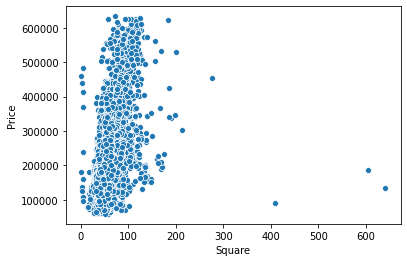

In [525]:
sns.scatterplot(x=df['Square'], y=df['Price'])
df = df[df['Square'] < 300].reset_index(drop=True)

In [526]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9974 entries, 0 to 9973
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             9974 non-null   object 
 1   DistrictId     9974 non-null   int64  
 2   Rooms          9974 non-null   float64
 3   Square         9974 non-null   float64
 4   LifeSquare     7862 non-null   float64
 5   KitchenSquare  9974 non-null   float64
 6   Floor          9974 non-null   int64  
 7   HouseFloor     9974 non-null   float64
 8   HouseYear      9974 non-null   int64  
 9   Ecology_1      9974 non-null   float64
 10  Ecology_2      9974 non-null   object 
 11  Ecology_3      9974 non-null   object 
 12  Social_1       9974 non-null   int64  
 13  Social_2       9974 non-null   int64  
 14  Social_3       9974 non-null   int64  
 15  Healthcare_1   5185 non-null   float64
 16  Helthcare_2    9974 non-null   int64  
 17  Shops_1        9974 non-null   int64  
 18  Shops_2 

In [527]:
df_obj_features = df.select_dtypes(include='object')
df_obj_features.head()

,Id,Ecology_2,Ecology_3,Shops_2
0,14038,B,B,B
1,15053,B,B,B
2,4765,B,B,B
3,5809,B,B,B
4,10783,B,B,B


In [528]:
df['Ecology_2'].value_counts(normalize=True)

B    0.990275
A    0.009725
Name: Ecology_2, dtype: float64

In [529]:
df['Ecology_3'].value_counts(normalize=True)

B    0.972428
A    0.027572
Name: Ecology_3, dtype: float64

In [530]:
df['Shops_2'].value_counts(normalize=True)

B    0.917786
A    0.082214
Name: Shops_2, dtype: float64

In [531]:
df.isnull().sum()

Id                  0
DistrictId          0
Rooms               0
Square              0
LifeSquare       2112
KitchenSquare       0
Floor               0
HouseFloor          0
HouseYear           0
Ecology_1           0
Ecology_2           0
Ecology_3           0
Social_1            0
Social_2            0
Social_3            0
Healthcare_1     4789
Helthcare_2         0
Shops_1             0
Shops_2             0
Price               0
dtype: int64

In [532]:
df = df[df.columns[1:]]

In [533]:
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [534]:
df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = df['LifeSquare'].median()

In [535]:
df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = df['Healthcare_1'].median()

In [536]:
df.isnull().sum()

DistrictId       0
Rooms            0
Square           0
LifeSquare       0
KitchenSquare    0
Floor            0
HouseFloor       0
HouseYear        0
Ecology_1        0
Ecology_2        0
Ecology_3        0
Social_1         0
Social_2         0
Social_3         0
Healthcare_1     0
Helthcare_2      0
Shops_1          0
Shops_2          0
Price            0
dtype: int64

In [537]:

# df = pd.concat([df, pd.get_dummies(df['Ecology_2'])], axis=1)
# df = pd.concat([df, pd.get_dummies(df['Ecology_3'])], axis=1)
df = pd.concat([df, pd.get_dummies(df['Shops_2'])], axis=1)

df.drop('Ecology_2', axis='columns', inplace=True)
df.drop('Ecology_3', axis='columns', inplace=True)
df.drop('Shops_2', axis='columns', inplace=True)
df.head(n=5)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price,A,B
0,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,33,7976,5,900.0,0,11,184966.930730,0,1
1,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,46,10309,1,240.0,1,16,300009.450063,0,1
2,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,34,7759,0,229.0,1,3,220925.908524,0,1
3,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,23,5735,3,1084.0,0,5,175616.227217,0,1
4,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,35,5776,1,2078.0,2,4,150226.531644,0,1


In [538]:
feature_names_for_stand = ["Square", "LifeSquare", "KitchenSquare", "Ecology_1", 
                           "Healthcare_1",  "Helthcare_2"]
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
stand_features = scaler.fit_transform(df[feature_names_for_stand])


In [539]:
df[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)

In [540]:
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8')

In [541]:
print(df.head())
target_name = "Price"
y = df[target_name]

df.drop('Price', axis='columns', inplace=True)
X = df

X.head()


   DistrictId  Rooms    Square  LifeSquare  KitchenSquare  Floor  HouseFloor  \
0          35    2.0 -0.427182   -0.087793       0.024856      7         9.0   
1          41    3.0  0.496893    0.051094       0.411312      7         9.0   
2          53    2.0 -0.585541   -0.091003      -1.134512      8        12.0   
3          58    2.0 -0.146786    0.217153       0.604540      8        17.0   
4          99    1.0 -0.862144   -0.161992       0.218084     11        12.0   

   HouseYear  Ecology_1  Social_1  Social_2  Social_3  Healthcare_1  \
0       1969  -0.250949        33      7976         5     -0.170371   
1       1978  -0.998104        46     10309         1     -1.054266   
2       1968  -0.581846        34      7759         0     -1.068997   
3       1977   2.678605        23      5735         3      0.076048   
4       1976  -0.895072        35      5776         1      1.407247   

   Helthcare_2  Shops_1          Price  A  B  
0    -0.883369       11  184966.930730  0  1 

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,A,B
0,35,2.0,-0.427182,-0.087793,0.024856,7,9.0,1969,-0.250949,33,7976,5,-0.170371,-0.883369,11,0,1
1,41,3.0,0.496893,0.051094,0.411312,7,9.0,1978,-0.998104,46,10309,1,-1.054266,-0.213505,16,0,1
2,53,2.0,-0.585541,-0.091003,-1.134512,8,12.0,1968,-0.581846,34,7759,0,-1.068997,-0.213505,3,0,1
3,58,2.0,-0.146786,0.217153,0.604540,8,17.0,1977,2.678605,23,5735,3,0.076048,-0.883369,5,0,1
4,99,1.0,-0.862144,-0.161992,0.218084,11,12.0,1976,-0.895072,35,5776,1,1.407247,0.456359,4,0,1


In [542]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=21)

In [543]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [544]:

def evaluate_preds(true_values, pred_values):
    print("R2:\t" + str(round(r2(true_values, pred_values), 3)) + "\n" +
          "MAE:\t" + str(round(mae(true_values, pred_values), 3)) + "\n" +
          "MSE:\t" + str(round(mse(true_values, pred_values), 3)))
    
    plt.figure(figsize=(10,10))
    
    sns.scatterplot(x=pred_values, y=true_values)
    plt.plot([true_values.min(), true_values.max()],
             [true_values.min(), true_values.max()],
             color="red", linestyle="--", alpha=0.5, linewidth=3)
    
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('True vs Predicted values')
    plt.show()



R2:	0.963
MAE:	10567.781
MSE:	322566641.186


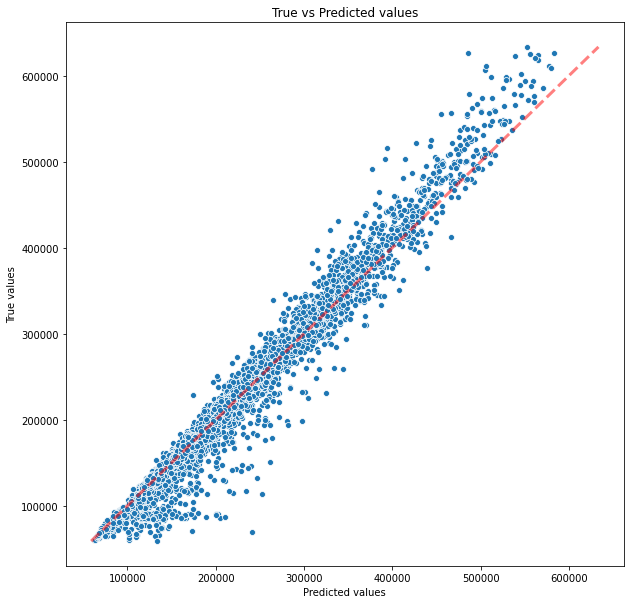

In [545]:
y_train_preds = rf_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

R2:	0.721
MAE:	28422.22
MSE:	2405312564.804


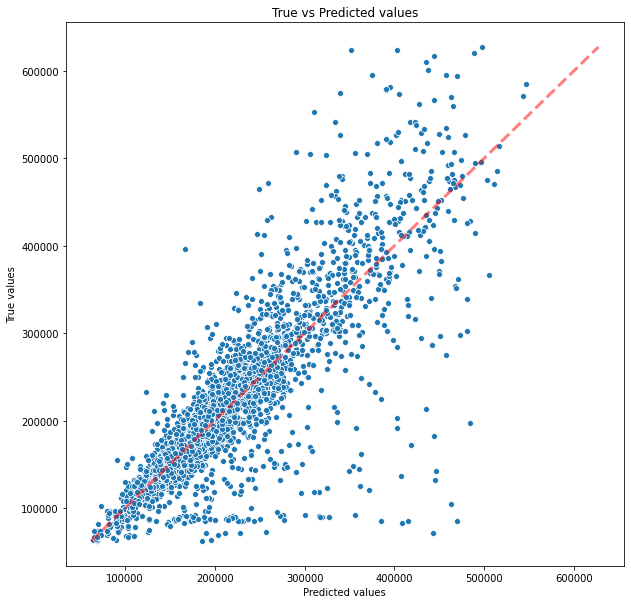

In [546]:
y_test_preds = rf_model.predict(X_test)
evaluate_preds(y_test, y_test_preds)

In [551]:
from sklearn.model_selection import KFold, GridSearchCV

params = {'n_estimators':[50, 75, 100, 150, 200, 300, 400], 
          'max_depth': [3, 5, 7, 10, 12, 15]}

gs = GridSearchCV(
    rf_model, 
    params, 
    scoring='r2', 
    cv=KFold(n_splits=3, random_state=21, shuffle=True),
    n_jobs=-1
)
gs.fit(X, y)
gs.best_params_

{'max_depth': 15, 'n_estimators': 300}

In [554]:
final_model = RandomForestRegressor(n_estimators=400, max_depth=10, random_state=21)
final_model.fit(X, y)

RandomForestRegressor(max_depth=10, n_estimators=400, random_state=21)

R2:	0.963
MAE:	10567.781
MSE:	322566641.186


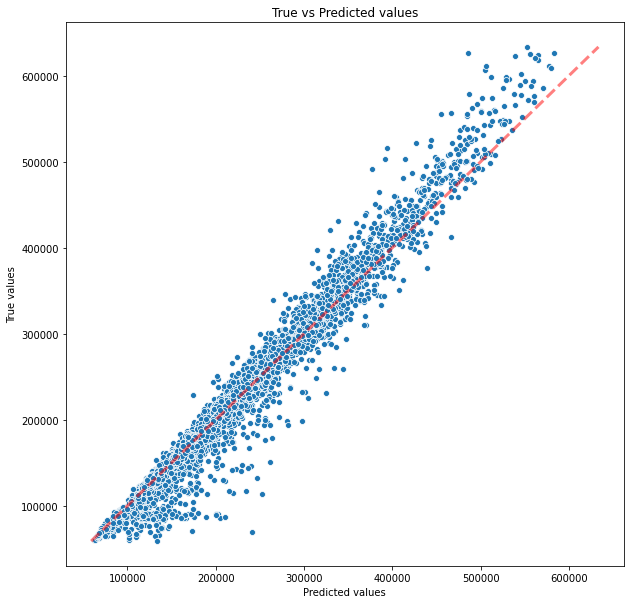

In [555]:
y_train_preds = rf_model.predict(X_train)
evaluate_preds(y_train, y_train_preds)

In [583]:
df = pd.read_csv(DATASET_TEST_PATH)
df = df[df.columns[1:]]
df.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2
0,58,2.0,49.882643,33.432782,6.0,6,14.0,1972,0.310199,B,B,11,2748,1,NaN,0,0,B
1,74,2.0,69.263183,NaN,1.0,6,1.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B
2,190,1.0,13.597819,15.948246,12.0,2,5.0,1909,0.000000,B,B,30,7538,87,4702.0,5,5,B
3,47,2.0,73.046609,51.940842,9.0,22,22.0,2007,0.101872,B,B,23,4583,3,NaN,3,3,B
4,27,1.0,47.527111,43.387569,1.0,17,17.0,2017,0.072158,B,B,2,629,1,NaN,0,0,A


In [584]:
df.loc[df['Healthcare_1'].isnull(), 'Healthcare_1'] = df['Healthcare_1'].median()
df.loc[df['LifeSquare'].isnull(), 'LifeSquare'] = df['LifeSquare'].median()

df = pd.concat([df, pd.get_dummies(df['Shops_2'])], axis=1)

df.drop('Ecology_2', axis='columns', inplace=True)
df.drop('Ecology_3', axis='columns', inplace=True)
df.drop('Shops_2', axis='columns', inplace=True)


stand_features = scaler.transform(df[feature_names_for_stand])
df[feature_names_for_stand] = pd.DataFrame(stand_features, columns=feature_names_for_stand)

y_predict = final_model.predict(df)

df_orig = pd.read_csv(DATASET_TEST_PATH)
y_predict = pd.DataFrame(y_predict, columns=["Price"])
y_predict = pd.concat([df_orig['Id'], y_predict], axis=1)

y_predict.head()

,Id,Price
0,725,158717.319653
1,15856,207609.952907
2,5480,199834.544077
3,15664,336288.318449
4,14275,138927.291375


In [ ]:
df.to_csv(PREPARED_DATASET_PATH, index=False, encoding='utf-8')